<a href="https://colab.research.google.com/github/alfcastillo90/perceptron_exercise/blob/master/Perceptr%C3%B3n_multicapa_para_detecci%C3%B3n_de_malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/alfcastillo90/perceptron_exercise/master/data.csv")

In [20]:
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [12]:
#eliminamos el hash, es una data irrelevante
data1 = data.drop(columns=['hash'], axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(43876, 101)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


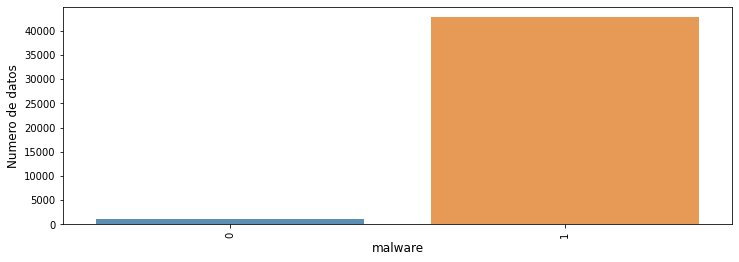

In [13]:
#visualizamos la data
cnt_pro = data1['malware'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Numero de datos', fontsize=12)
plt.xlabel('malware', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [21]:
#Dividimos la información

from sklearn.model_selection import train_test_split
Y = data1['malware']
X = data1.drop(columns=['malware'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (39488, 100)
Y train shape:  (39488,)
X test shape:  (4388, 100)
Y test shape:  (4388,)


In [22]:
# Construimos el modelo

from sklearn.neural_network import MLPClassifier

# 1) Definimos el modelo
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, random_state=42)

# 2) Entrenamos el modelo
mlp.fit(X_train, Y_train)


# Predecimos el target
prediction = mlp.predict(X_test)

In [ ]:
test_acc_mlp = round(mlp.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_mlp = round(mlp.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

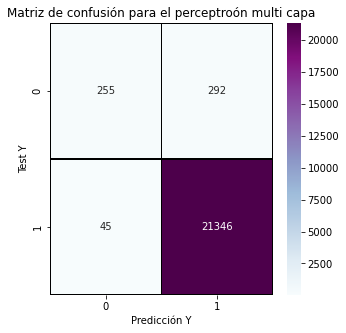

In [17]:
#Utilizaremos una matriz de confuzion para hacer una sumarizacion de los resultados de la predición en la clasificación. 
#El numero de las correcciónes correctas e incorrectas es contabilizado

mlp_cm = confusion_matrix(Y_test, prediction)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Matriz de confusión para el perceptroón multi capa')
plt.xlabel('Predicción Y')
plt.ylabel('Test Y')
plt.show()

In [ ]:
#Presición de resultados

model1 = pd.DataFrame({
    'Model': ['MLP'],
    'Train Score': [train_acc_mlp],
    'Test Score': [test_acc_mlp]
})
model1.sort_values(by='Test Score', ascending=False)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, prediction)

print('puntuación promedio de precision-recall: {0:0.2f}'.format(
      average_precision))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(mlp,X_train, Y_train)
disp.ax_.set_title('Curva de Precision-Recall: '
                   'AP={0:0.2f}'.format(average_precision))